# TikTok Performance predictor 

## Create Merged Dataset

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# show all columns
pd.set_option('display.max_columns', None)

In [59]:
# Read TikTok Data
tik = pd.read_csv('tiktok.csv')

In [60]:
# merge spotify data to one file and add a column "era"
df60 = pd.read_csv('Spotify Data/Spotify Kaggle Dataframe/dataset-of-60s.csv')
df60['era'] = '60s'

df70 = pd.read_csv('Spotify Data/Spotify Kaggle Dataframe/dataset-of-70s.csv')
df70['era'] = '70s'

df80 = pd.read_csv('Spotify Data/Spotify Kaggle Dataframe/dataset-of-80s.csv')
df80['era'] = '80s'

df90 = pd.read_csv('Spotify Data/Spotify Kaggle Dataframe/dataset-of-90s.csv')
df90['era'] = '90s'

df00 = pd.read_csv('Spotify Data/Spotify Kaggle Dataframe/dataset-of-00s.csv')
df00['era'] = '00s'

df10 = pd.read_csv('Spotify Data/Spotify Kaggle Dataframe/dataset-of-10s.csv')
df10['era'] = '10s'

df20 = pd.read_csv('Spotify Data/Billboard/billboard_hot_100_audio_features.csv')
df20['era'] = '20s'

spotify = pd.concat([df60, df70, df80, df90, df00, df10], ignore_index=True)

In [61]:
# adapting 'release_date' to show "era" in the tik dataframe
tik['release_year'] = tik['release_date'].apply(lambda x: x.split('-')[0])

era_ranges = [(1960, 1969, "60s"),
              (1970, 1979, "70s"),
              (1980, 1989, "80s"),
              (1990, 1999, "90s"),
              (2000, 2009, "00s"),
              (2010, 2019, "10s"),
              (2020, 2029, "20s")]

# Function to assign era based on release year
def assign_era(year):
    for era_range in era_ranges:
        if era_range[0] <= year <= era_range[1]:
            return era_range[2]
    return "Unknown"  # In case the year doesn't fall into any specified range

# Apply the assign_era function to create the era column
tik['era'] = tik['release_year'].apply(lambda x: assign_era(int(x)))

tik.drop('release_year', axis=1, inplace=True)
tik.drop('release_date', axis=1, inplace=True)

In [62]:
# checking if there is "-1" value for "key"
if -1 in spotify['key'].values:
    print("There is a value of -1 in the column")
else:
    print("There is no value of -1 in the column")

if -1 in tik['key'].values:
    print("There is a value of -1 in the column")
else:
    print("There is no value of -1 in the column")

There is no value of -1 in the column
There is no value of -1 in the column


In [63]:
# define key_mapping dictionary
key_mapping = {
    0: 'C',
    1: 'C# / Db',
    2: 'D',
    3: 'D# / Eb',
    4: 'E',
    5: 'F',
    6: 'F# / Gb',
    7: 'G',
    8: 'G# / Ab',
    9: 'A',
    10: 'A# / Bb',
    11: 'B'
}

# use dictionary to replace numerical values with string values
spotify['key'] = spotify['key'].replace(key_mapping)
tik['key'] = tik['key'].replace(key_mapping)


In [64]:
# define mode_mapping dictionary
mode_mapping = {0: 'minor', 1: 'major'}

# use dictionary to replace numerical values with string values
spotify['mode'] = spotify['mode'].replace(mode_mapping)
tik['mode'] = tik['mode'].replace(mode_mapping)

In [65]:
# Formatting spotify uri by removing "spotify:track:"
spotify['uri'] = spotify['uri'].str.replace('spotify:track:', '')

# Umbenenen der Splate uri in track_id
spotify.rename(columns={'uri': 'track_id'}, inplace=True)

In [66]:
tik.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre,era
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,28,0.597,0.800,C# / Db,-5.423,minor,0.3120,0.0461,0.0,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE,10s
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,75,0.832,0.391,G# / Ab,-8.504,major,0.0628,0.0564,0.0,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE,00s
2,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,75,0.832,0.391,G# / Ab,-8.504,major,0.0628,0.0564,0.0,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE,00s
3,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,76,0.571,0.767,D,-5.160,major,0.2870,0.3360,0.0,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,TIKTOK DANCE,20s
4,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,72,0.548,0.839,F# / Gb,-2.371,major,0.0644,0.1350,0.0,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638250,TIKTOK DANCE,10s


In [67]:
tik = tik.drop_duplicates(subset=['track_id'], keep='first')
spotify = spotify.drop_duplicates(subset=['track_id'], keep='first')

In [68]:
# create new feature in tiktok dataset to show social media success
# Create a new binary feature based on the "popularity" feature
tik['sm_target'] = tik['popularity'].apply(lambda x: 1 if x > 30 else 0)


In [69]:
spotify.head()

,track,artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,era
0,Jealous Kind Of Fella,Garland Green,1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,D# / Eb,-7.727,major,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,5hjsmSnUefdUqzsDogisiX,0.498,0.505,D# / Eb,-12.475,major,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,F,-13.392,major,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,G,-12.058,minor,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,1rQ0clvgkzWr001POOPJWx,0.515,0.765,B,-3.515,minor,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [70]:
#rename features, to later be able to link the data easily
column_name_changes = {
    'track_name': 'track',
    'artist_name': 'artist',
    'duration': 'duration_ms',
    # Add more column name changes here if needed
}
# Rename the columns in df2
tik.rename(columns=column_name_changes, inplace=True)

features_to_delete = ['artist_id', 'album_id', "playlist_id", "playlist_name", "duration_mins"]
# Add more feature names to be deleted as needed

# Delete the features from df2
tik.drop(features_to_delete, axis=1, inplace=True)

In [71]:
tik.head()

,track_id,track,artist,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,era,sm_target
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,Lloyd,302186,28,0.597,0.800,C# / Db,-5.423,minor,0.3120,0.0461,0.000000,0.1800,0.565,155.932,TIKTOK DANCE,10s,0
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),T-Pain,238800,75,0.832,0.391,G# / Ab,-8.504,major,0.0628,0.0564,0.000000,0.2240,0.436,104.961,TIKTOK DANCE,00s,1
3,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),Blxst,161684,76,0.571,0.767,D,-5.160,major,0.2870,0.3360,0.000000,0.0809,0.605,93.421,TIKTOK DANCE,20s,1
4,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),Gryffin,218295,72,0.548,0.839,F# / Gb,-2.371,major,0.0644,0.1350,0.000000,0.1020,0.314,98.932,TIKTOK DANCE,10s,1
5,7BoobGhD4x5K96Me0hqC8Q,Build a Bitch,Bella Poarch,122772,89,0.855,0.463,D# / Eb,-7.454,major,0.0367,0.2170,0.000018,0.3470,0.866,102.931,TIKTOK DANCE,20s,1


In [72]:
spotify.head()

,track,artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,era
0,Jealous Kind Of Fella,Garland Green,1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,D# / Eb,-7.727,major,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,5hjsmSnUefdUqzsDogisiX,0.498,0.505,D# / Eb,-12.475,major,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,F,-13.392,major,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,G,-12.058,minor,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,1rQ0clvgkzWr001POOPJWx,0.515,0.765,B,-3.515,minor,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


In [73]:
# Add "tiktok" column and set initial value to 0
spotify['tiktok'] = 0
tik['tiktok'] = 1

# Add "spotify" column and set initial value to 1
spotify['spotify'] = 1
tik['spotify'] = 0

In [74]:
spotify

,track,artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,era,tiktok,spotify
0,Jealous Kind Of Fella,Garland Green,1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,D# / Eb,-7.727,major,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,60s,0,1
1,Initials B.B.,Serge Gainsbourg,5hjsmSnUefdUqzsDogisiX,0.498,0.505,D# / Eb,-12.475,major,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,60s,0,1
2,Melody Twist,Lord Melody,6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,F,-13.392,major,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,60s,0,1
3,Mi Bomba Sonó,Celia Cruz,7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,G,-12.058,minor,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,60s,0,1
4,Uravu Solla,P. Susheela,1rQ0clvgkzWr001POOPJWx,0.515,0.765,B,-3.515,minor,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,60s,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,Lotus Flowers,Yolta,4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,A,-14.430,major,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,10s,0,1
41102,Calling My Spirit,Kodak Black,2MShy1GSSgbmGUxADNIao5,0.910,0.366,C# / Db,-9.954,major,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,10s,0,1
41103,Teenage Dream,Katy Perry,55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,A# / Bb,-4.581,major,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,10s,0,1
41104,Stormy Weather,Oscar Peterson,4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,G,-16.070,major,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,10s,0,1


In [75]:
same_tracks_df = pd.merge(spotify, tik, on='track_id', how='inner')
track_ids = same_tracks_df['track_id'].values

In [76]:
#create merge
data = pd.merge(spotify, tik, on='track_id', how='outer')

In [77]:
data

,track_x,artist_x,track_id,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,duration_ms_x,time_signature,chorus_hit,sections,target,era_x,tiktok_x,spotify_x,track_y,artist_y,duration_ms_y,popularity,danceability_y,energy_y,key_y,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,genre,era_y,sm_target,tiktok_y,spotify_y
0,Jealous Kind Of Fella,Garland Green,1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,D# / Eb,-7.727,major,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533.0,3.0,32.94975,9.0,1.0,60s,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Initials B.B.,Serge Gainsbourg,5hjsmSnUefdUqzsDogisiX,0.498,0.505,D# / Eb,-12.475,major,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613.0,4.0,48.82510,10.0,0.0,60s,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Melody Twist,Lord Melody,6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,F,-13.392,major,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960.0,4.0,37.22663,12.0,0.0,60s,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mi Bomba Sonó,Celia Cruz,7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,G,-12.058,minor,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907.0,4.0,24.75484,8.0,0.0,60s,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Uravu Solla,P. Susheela,1rQ0clvgkzWr001POOPJWx,0.515,0.765,B,-3.515,minor,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600.0,4.0,21.79874,14.0,0.0,60s,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43803,NaN,NaN,4uqh9bualXNHXXwO2wPorc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daisies,Katy Perry,173123.0,71.0,0.639,0.546,C# / Db,-5.382,major,0.0407,0.0837,0.000000,0.122,0.149,122.179,_TIKTOK,20s,1.0,1.0,0.0
43804,NaN,NaN,03f7xZmt2wHCIDJBFPK8G4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Soap,Melanie Martinez,209426.0,68.0,0.595,0.689,F# / Gb,-6.107,minor,0.1480,0.2540,0.000005,0.129,0.213,168.112,_TIKTOK,10s,1.0,1.0,0.0
43805,NaN,NaN,4kIpBfvK44bxqX7zo8K1oP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,시작,Gaho,202440.0,67.0,0.591,0.818,E,-3.532,major,0.0730,0.1720,0.000000,0.126,0.574,108.107,_TIKTOK,20s,1.0,1.0,0.0
43806,NaN,NaN,1lNHWPDvKEbamKezpLq7HW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no song without you,HONNE,160346.0,64.0,0.788,0.473,C,-12.744,major,0.0328,0.4890,0.254000,0.109,0.810,105.429,_TIKTOK,20s,1.0,1.0,0.0


In [78]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40560 entries, 0 to 41105
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             40560 non-null  object 
 1   artist            40560 non-null  object 
 2   track_id          40560 non-null  object 
 3   danceability      40560 non-null  float64
 4   energy            40560 non-null  float64
 5   key               40560 non-null  object 
 6   loudness          40560 non-null  float64
 7   mode              40560 non-null  object 
 8   speechiness       40560 non-null  float64
 9   acousticness      40560 non-null  float64
 10  instrumentalness  40560 non-null  float64
 11  liveness          40560 non-null  float64
 12  valence           40560 non-null  float64
 13  tempo             40560 non-null  float64
 14  duration_ms       40560 non-null  int64  
 15  time_signature    40560 non-null  int64  
 16  chorus_hit        40560 non-null  float6

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43808 entries, 0 to 43807
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_x             40560 non-null  object 
 1   artist_x            40560 non-null  object 
 2   track_id            43808 non-null  object 
 3   danceability_x      40560 non-null  float64
 4   energy_x            40560 non-null  float64
 5   key_x               40560 non-null  object 
 6   loudness_x          40560 non-null  float64
 7   mode_x              40560 non-null  object 
 8   speechiness_x       40560 non-null  float64
 9   acousticness_x      40560 non-null  float64
 10  instrumentalness_x  40560 non-null  float64
 11  liveness_x          40560 non-null  float64
 12  valence_x           40560 non-null  float64
 13  tempo_x             40560 non-null  float64
 14  duration_ms_x       40560 non-null  float64
 15  time_signature      40560 non-null  float64
 16  chor

In [80]:
# prepare merged dataset, so feature values are merged as well
features_to_combine = ["track", "artist", "duration_ms", 'danceability', 'energy', 'key', "loudness", "mode",
                       "speechiness", "acousticness", "instrumentalness","liveness", "valence", "tempo", 
                        "duration_ms", "era" ]
# Add more feature names to be combined as needed

# Combine the features from spotify and tik into the merged dataset
# Compute the merged DataFrame with correct "tiktok" values

data['tiktok'] = data.apply(lambda row: 1 if row['tiktok_x'] == 1 or row['tiktok_y'] == 1 else 0, axis=1)
data['spotify'] = data.apply(lambda row: 1 if row['spotify_x'] == 1 or row['spotify_y'] == 1 else 0, axis=1)

for feature in features_to_combine:
    data[feature] = data[f'{feature}_x'].fillna(data[f'{feature}_y'])

# Drop the duplicate features from merged_df
data.drop([f'{feature}_x' for feature in features_to_combine] + [f'{feature}_y' for feature in features_to_combine], axis=1, inplace=True)
data = data.drop(["tiktok_x", "tiktok_y", "spotify_x", "spotify_y", "genre"], axis=1)



In [81]:
# Fill NA with 0 for feature sm_target
data['sm_target'] = data['sm_target'].fillna(0)


In [82]:
data = data.drop_duplicates(subset=['track_id', 'popularity'], keep='first')

In [83]:
# Add the genre from combined.csv to data
genre_df = pd.read_csv('combined.csv')

data = pd.merge(data, genre_df[['artist', 'main_parent_genre']], on='artist', how='left')

In [84]:
data

,track_id,time_signature,chorus_hit,sections,target,popularity,sm_target,tiktok,spotify,track,artist,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,era,main_parent_genre
0,1dtKN6wwlolkM8XZy2y9C1,3.0,32.94975,9.0,1.0,NaN,0.0,0,1,Jealous Kind Of Fella,Garland Green,173533.0,0.417,0.620,D# / Eb,-7.727,major,0.0403,0.4900,0.000000,0.0779,0.845,185.655,60s,Blues and Jazz
1,5hjsmSnUefdUqzsDogisiX,4.0,48.82510,10.0,0.0,NaN,0.0,0,1,Initials B.B.,Serge Gainsbourg,213613.0,0.498,0.505,D# / Eb,-12.475,major,0.0337,0.0180,0.107000,0.1760,0.797,101.801,60s,Rock
2,6uk8tI6pwxxdVTNlNOJeJh,4.0,37.22663,12.0,0.0,NaN,0.0,0,1,Melody Twist,Lord Melody,223960.0,0.657,0.649,F,-13.392,major,0.0380,0.8460,0.000004,0.1190,0.908,115.940,60s,Other
3,7aNjMJ05FvUXACPWZ7yJmv,4.0,24.75484,8.0,0.0,NaN,0.0,0,1,Mi Bomba Sonó,Celia Cruz,157907.0,0.590,0.545,G,-12.058,minor,0.1040,0.7060,0.024600,0.0610,0.967,105.592,60s,World Music
4,1rQ0clvgkzWr001POOPJWx,4.0,21.79874,14.0,0.0,NaN,0.0,0,1,Uravu Solla,P. Susheela,245600.0,0.515,0.765,B,-3.515,minor,0.1240,0.8570,0.000872,0.2130,0.906,114.617,60s,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43803,4uqh9bualXNHXXwO2wPorc,NaN,NaN,NaN,NaN,71.0,1.0,1,0,Daisies,Katy Perry,173123.0,0.639,0.546,C# / Db,-5.382,major,0.0407,0.0837,0.000000,0.1220,0.149,122.179,20s,Pop
43804,03f7xZmt2wHCIDJBFPK8G4,NaN,NaN,NaN,NaN,68.0,1.0,1,0,Soap,Melanie Martinez,209426.0,0.595,0.689,F# / Gb,-6.107,minor,0.1480,0.2540,0.000005,0.1290,0.213,168.112,10s,Pop
43805,4kIpBfvK44bxqX7zo8K1oP,NaN,NaN,NaN,NaN,67.0,1.0,1,0,시작,Gaho,202440.0,0.591,0.818,E,-3.532,major,0.0730,0.1720,0.000000,0.1260,0.574,108.107,20s,World Music
43806,1lNHWPDvKEbamKezpLq7HW,NaN,NaN,NaN,NaN,64.0,1.0,1,0,no song without you,HONNE,160346.0,0.788,0.473,C,-12.744,major,0.0328,0.4890,0.254000,0.1090,0.810,105.429,20s,Rap and Hip Hop


In [85]:
data.to_csv('TikTokSpotifyMerged.csv', index=False)

In [86]:
# extract only spotify songs
spotify_songs = data[data['spotify'] == 1]

# Save the filtered dataframe to a CSV file
spotify_songs.to_csv('spotify_songs.csv', index=False)

## Check merged dataframe

In [87]:
# Extract songs that are in tiktok and spotify dataframe
songs_in_tik_and_spot = data[data['track_id'].isin(track_ids)]

In [88]:
songs_in_tik_and_spot

,track_id,time_signature,chorus_hit,sections,target,popularity,sm_target,tiktok,spotify,track,artist,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,era,main_parent_genre
11806,0ofHAoxe9vBkTCp2UQIavz,4.0,32.80048,12.0,1.0,85.0,1.0,1,1,Dreams,Fleetwood Mac,257800.0,0.828,0.492,C,-9.744,major,0.0276,0.0644,0.004280,0.1280,0.7890,120.151,70s,Rock
12726,0YveezON7jpiaHA8fnUHxN,4.0,15.74866,16.0,1.0,65.0,1.0,1,1,Roundabout,Yes,510573.0,0.410,0.761,E,-9.453,minor,0.0687,0.0682,0.007700,0.0758,0.3910,132.889,70s,Rock
13964,7GVUmCP00eSsqc4tzj1sDD,4.0,45.64664,9.0,1.0,77.0,1.0,1,1,Come And Get Your Love,Redbone,205933.0,0.731,0.804,B,-7.621,minor,0.0473,0.1720,0.000280,0.0685,0.9570,107.383,70s,Other
16834,1ko2lVN0vKGUl9zrU0qSlT,4.0,58.38841,9.0,1.0,80.0,1.0,1,1,Just The Two Of Us,"Grover Washington, Jr. (With Bill Withers)",237106.0,0.803,0.488,C# / Db,-9.303,major,0.0803,0.5760,0.060900,0.0763,0.6240,95.771,80s,Other
18914,57JVGBtBLCfHw2muk5416J,4.0,38.17584,11.0,1.0,75.0,1.0,1,1,Another One Bites The Dust,Queen,214653.0,0.933,0.528,F,-6.472,minor,0.1620,0.1120,0.329000,0.1630,0.7560,109.975,80s,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40403,3oZoXyU0SkDldgS7AcN4y4,4.0,28.61976,10.0,1.0,64.0,1.0,1,1,Get Low,Dillon Francis & DJ Snake,212773.0,0.674,0.932,B,-4.424,minor,0.0859,0.0282,0.710000,0.6840,0.7280,101.033,10s,Electronic Music and Dance
40444,4jTiyLlOJVJj3mCr7yfPQD,4.0,43.26477,9.0,1.0,74.0,1.0,1,1,This Could Be Us,Rae Sremmurd,206307.0,0.732,0.690,C,-4.992,minor,0.1340,0.2910,0.000000,0.1160,0.7580,143.072,10s,Pop
40485,5p7ujcrUXASCNwRaWNHR1C,4.0,43.53930,11.0,1.0,81.0,1.0,1,1,Without Me,Halsey,201661.0,0.752,0.488,F# / Gb,-7.050,major,0.0705,0.2970,0.000009,0.0936,0.5330,136.041,10s,Electronic Music and Dance
40507,0AluA5RNsa4Cx6XRhf2hWZ,4.0,36.82959,10.0,1.0,78.0,1.0,1,1,10 Freaky Girls,Metro Boomin Featuring 21 Savage,208293.0,0.810,0.353,F# / Gb,-9.931,minor,0.3100,0.5880,0.000000,0.1020,0.0727,88.031,10s,Rap and Hip Hop


In [89]:
target_counts = songs_in_tik_and_spot['target'].value_counts()
target_counts

1.0    306
0.0      6
Name: target, dtype: int64

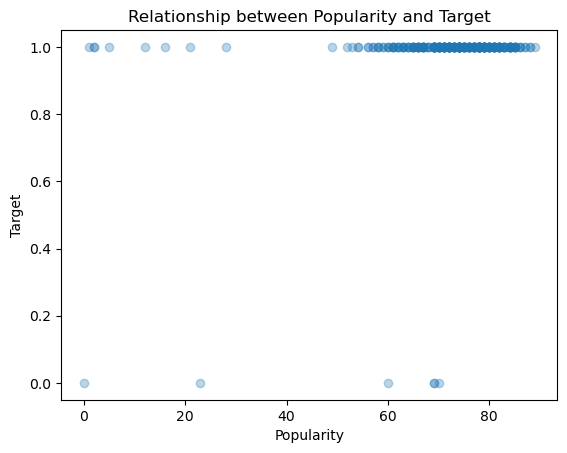

In [90]:
popularity = songs_in_tik_and_spot['popularity']
target = songs_in_tik_and_spot['target']

# Create a scatter plot with density-based color
plt.scatter(popularity, target, alpha=0.3)

# Set labels and title
plt.xlabel('Popularity')
plt.ylabel('Target')
plt.title('Relationship between Popularity and Target')

# Show the plot
plt.show()

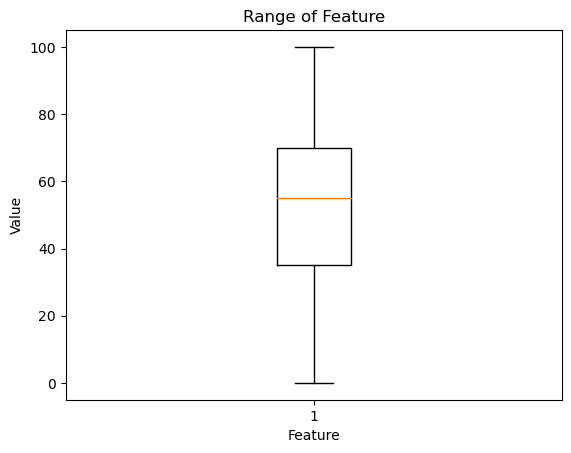

In [91]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Extract the feature column
feature_values = tik['popularity']

# Create a box plot
plt.boxplot(feature_values)

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('Range of Feature')

# Show the plot
plt.show()

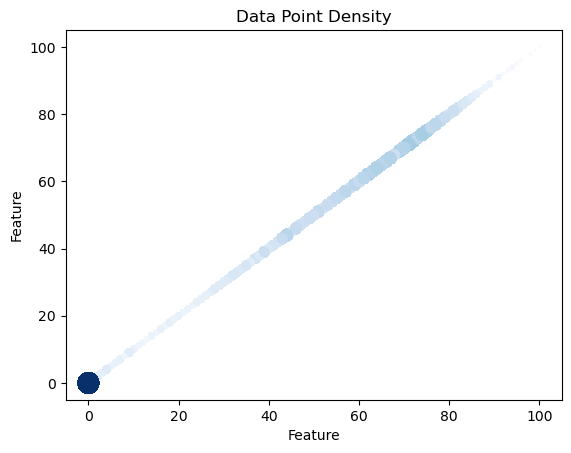

In [92]:
import matplotlib.pyplot as plt
# Assuming your DataFrame is named df

# Extract the feature column and assign it to x-axis
x = tik['popularity']

# Set marker size and alpha value based on density
density = tik['popularity'].value_counts()  # Calculate density of data points
marker_size = density[x]  # Use density values as marker sizes
marker_alpha = density[x] / density.max()  # Use density values normalized between 0 and 1 as alpha values

# Create the scatter plot
plt.scatter(x, x, s=marker_size, c=marker_alpha, cmap='Blues')

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Data Point Density')

# Show the plot
plt.show()


In [93]:
count1 = len(tik[tik['popularity'] < 40])
print(f"The number of data points with a popularity value lower than 40: {count1}")

count2 = len(tik[tik['popularity'] > 40])
print(f"The number of data points with a popularity value higher than 40: {count2}")


The number of data points with a popularity value lower than 40: 1039
The number of data points with a popularity value higher than 40: 2489


In [119]:
data

,sm_target,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key_A,key_A# / Bb,key_B,key_C,key_C# / Db,key_D,key_D# / Eb,key_E,key_F,key_F# / Gb,key_G,key_G# / Ab,mode_major,mode_minor,era_00s,era_10s,era_20s,era_60s,era_70s,era_80s,era_90s,main_parent_genre_Blues and Jazz,main_parent_genre_Classical and Opera,main_parent_genre_Country and Folk,main_parent_genre_Electronic Music and Dance,main_parent_genre_Other,main_parent_genre_Pop,main_parent_genre_Rap and Hip Hop,main_parent_genre_Reggae and Ska,main_parent_genre_Rock,main_parent_genre_World Music
0,0.0,173533.0,0.417,0.620,-7.727,0.0403,0.4900,0.000000,0.0779,0.845,185.655,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.0,213613.0,0.498,0.505,-12.475,0.0337,0.0180,0.107000,0.1760,0.797,101.801,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,223960.0,0.657,0.649,-13.392,0.0380,0.8460,0.000004,0.1190,0.908,115.940,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,157907.0,0.590,0.545,-12.058,0.1040,0.7060,0.024600,0.0610,0.967,105.592,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,245600.0,0.515,0.765,-3.515,0.1240,0.8570,0.000872,0.2130,0.906,114.617,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43803,1.0,173123.0,0.639,0.546,-5.382,0.0407,0.0837,0.000000,0.1220,0.149,122.179,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
43804,1.0,209426.0,0.595,0.689,-6.107,0.1480,0.2540,0.000005,0.1290,0.213,168.112,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
43805,1.0,202440.0,0.591,0.818,-3.532,0.0730,0.1720,0.000000,0.1260,0.574,108.107,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
43806,1.0,160346.0,0.788,0.473,-12.744,0.0328,0.4890,0.254000,0.1090,0.810,105.429,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Data Preparation

In [95]:
# Transform the data to prepare it for usage in a machine learning model

# Clean duplicates based on track_id and popularity
#data = tik.drop_duplicates(subset=['track_id', 'popularity'], keep='first')

# Drop unnecessary columns
data = data.drop(['track_id',"target", "popularity", "target", "sections", "chorus_hit", "time_signature" ], axis=1)
data = data.drop(['tiktok', 'artist', 'spotify', "track"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43808 entries, 0 to 43807
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sm_target          43808 non-null  float64
 1   duration_ms        43808 non-null  float64
 2   danceability       43808 non-null  float64
 3   energy             43808 non-null  float64
 4   key                43808 non-null  object 
 5   loudness           43808 non-null  float64
 6   mode               43808 non-null  object 
 7   speechiness        43808 non-null  float64
 8   acousticness       43808 non-null  float64
 9   instrumentalness   43808 non-null  float64
 10  liveness           43808 non-null  float64
 11  valence            43808 non-null  float64
 12  tempo              43808 non-null  float64
 13  era                43808 non-null  object 
 14  main_parent_genre  43808 non-null  object 
dtypes: float64(11), object(4)
memory usage: 5.3+ MB


In [96]:
# Speichern von data als csv
# data.to_csv("Spotify_TT.csv")

In [97]:
data = pd.get_dummies(data)

In [ ]:
data

## Data Modelling

### Model: RandomForestClassifier

In [98]:
import xgboost as xgb  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler


In [99]:
# Split your dataframe into features (X) and target variable (y)
X = data.drop('sm_target', axis=1) # assuming all other columns are features
y = data['sm_target']

# Split your data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Standardize your features because some models perform better with standardized data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Define the classifier and fit it to your data
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [100]:
# Predict the labels for the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = randomforest.predict(X_test)

# Evaluate the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9591417484592559
Confusion Matrix:
 [[12155   161]
 [  376   451]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     12316
         1.0       0.74      0.55      0.63       827

    accuracy                           0.96     13143
   macro avg       0.85      0.77      0.80     13143
weighted avg       0.96      0.96      0.96     13143



In [115]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [1]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=randomforest, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best parameters: ", best_params)
print("Best score: ", best_score)

# Use the best parameters to create a new random forest classifier
best_randomforest = RandomForestClassifier(**best_params, class_weight='balanced')
best_randomforest.fit(X_train, y_train)



Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}
Best score:  0.9576063916517203


RandomForestClassifier(class_weight='balanced', min_samples_split=10,
                       n_estimators=250)

In [116]:
# Evaluate the performance on the test set
# y_pred_best = best_randomforest.predict(X_test)

# Get predicted probabilities for positive class
y_pred_proba = best_randomforest.predict_proba(X_test)[:, 1]

# Set custom threshold
custom_threshold = 0.4

# Generate predictions based on custom threshold
y_pred_custom = (y_pred_proba > custom_threshold).astype(int)

print('Accuracy:', accuracy_score(y_test, y_pred_custom))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_custom))
print('Classification Report:\n', classification_report(y_test, y_pred_custom))

Accuracy: 0.9517613938978924
Confusion Matrix:
 [[11921   395]
 [  239   588]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     12316
         1.0       0.60      0.71      0.65       827

    accuracy                           0.95     13143
   macro avg       0.79      0.84      0.81     13143
weighted avg       0.96      0.95      0.95     13143



In [117]:
import pickle

# Save the trained random forest classifier to a file
filename = 'randomforest_model.pkl'
pickle.dump(best_randomforest, open(filename, 'wb'))

### Model: Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
X = data.drop('sm_target', axis=1) # assuming all other columns are features
y = data['sm_target']

# Split your data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     20513
         1.0       0.68      0.42      0.52      1391

    accuracy                           0.95     21904
   macro avg       0.82      0.70      0.75     21904
weighted avg       0.94      0.95      0.95     21904



### Model: Decision Tree

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [105]:
X = data.drop('sm_target', axis=1) # assuming all other columns are features
y = data['sm_target']

# Split your data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     12316
         1.0       0.52      0.55      0.54       827

    accuracy                           0.94     13143
   macro avg       0.75      0.76      0.75     13143
weighted avg       0.94      0.94      0.94     13143



### Model: Gradient Boosting Model

In [106]:
from xgboost import XGBClassifier

In [107]:
X = data.drop('sm_target', axis=1) # assuming all other columns are features
y = data['sm_target']

# Split your data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     12316
         1.0       0.68      0.51      0.58       827

    accuracy                           0.95     13143
   macro avg       0.82      0.74      0.78     13143
weighted avg       0.95      0.95      0.95     13143



### Model: Neural Network

In [108]:
from sklearn.neural_network import MLPClassifier

In [109]:
X = data.drop('sm_target', axis=1) # assuming all other columns are features
y = data['sm_target']

# Split your data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     12316
         1.0       0.52      0.54      0.53       827

    accuracy                           0.94     13143
   macro avg       0.74      0.75      0.75     13143
weighted avg       0.94      0.94      0.94     13143

